In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [3]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [4]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
def create_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [6]:
batch_sizes = [len(x_train), 1, 32]  
history_dict = {}

for batch_size in batch_sizes:
    print(f"Training with batch size: {batch_size}")
    model = create_model()
    history = model.fit(x_train, y_train,
                        epochs=10,
                        batch_size=batch_size,
                        validation_data=(x_test, y_test),
                        verbose=1)
    history_dict[batch_size] = history

Training with batch size: 60000
Epoch 1/10


c:\Users\dhaks\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1213 - loss: 2.4498 - val_accuracy: 0.1686 - val_loss: 2.2832
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.1726 - loss: 2.2834 - val_accuracy: 0.2478 - val_loss: 2.1347
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.2517 - loss: 2.1370 - val_accuracy: 0.3703 - val_loss: 1.9994
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.3732 - loss: 2.0037 - val_accuracy: 0.4954 - val_loss: 1.8726
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.4950 - loss: 1.8787 - val_accuracy: 0.5739 - val_loss: 1.7511
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.5757 - loss: 1.7590 - val_accuracy: 0.6380 - val_loss: 1.6338
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.6313 - loss: 1.6436 - val_accuracy: 0.6816 - val_loss: 1.5208
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.6733 - loss: 1.5326 - val_accuracy: 0.7104 - val_loss: 1.4131
Epoch 

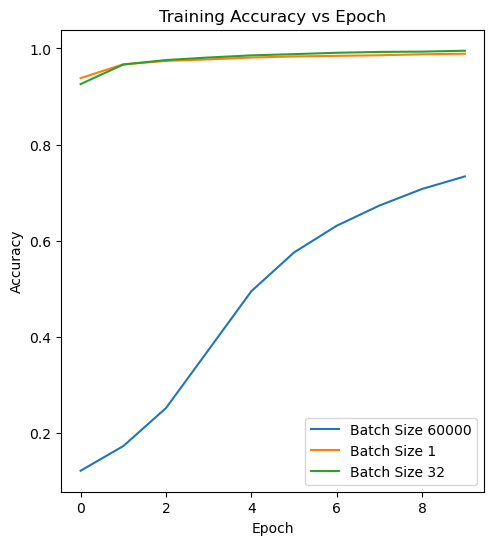

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for batch_size, history in history_dict.items():
    plt.plot(history.history['accuracy'], label=f'Batch Size {batch_size}')
plt.title('Training Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

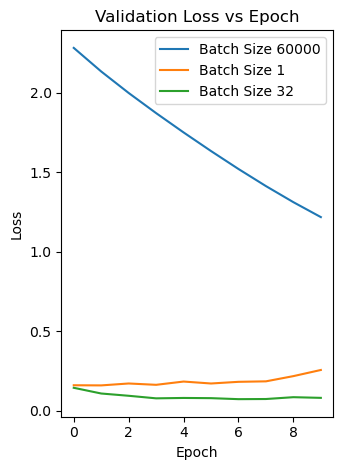

In [8]:
plt.subplot(1, 2, 2)
for batch_size, history in history_dict.items():
    plt.plot(history.history['val_loss'], label=f'Batch Size {batch_size}')
plt.title('Validation Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show() 